# Local Variational Methods

An alternative 'local' approach to a variational approximation which involves finding bounds on functions over individual variables or groups of variables within a model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (8, 4)

## A first example $f(x) = \exp(-x)$

$$
    f(x) = \max_{\eta}\left\{\eta x - \eta + \eta\log(-\eta)\right\}
$$

In [3]:
def f(x):
    return np.exp(-x)


def f_linear(x, η):
    """
    First order linear approximation to exp(-x)
    
    Parameters
    ----------
    x: float
        Evaluation point
    η: float
        η := -exp(-x)
    """
    return η * x - η + η * np.log(-η)


def f_prime(f, x, eps=1e-8):
    return (f(x + eps) - f(x)) / eps


def gradient_descent(f, xinit, eps=1e-5, alpha=0.01):
    delta = np.inf
    x_star = xinit
    while delta > eps:
        grad_eta = f_prime(f, x_star)
        x_star_new = x_star - alpha * grad_eta
        delta = abs(x_star_new / x_star - 1)
        x_star = x_star_new
    
    return x_star

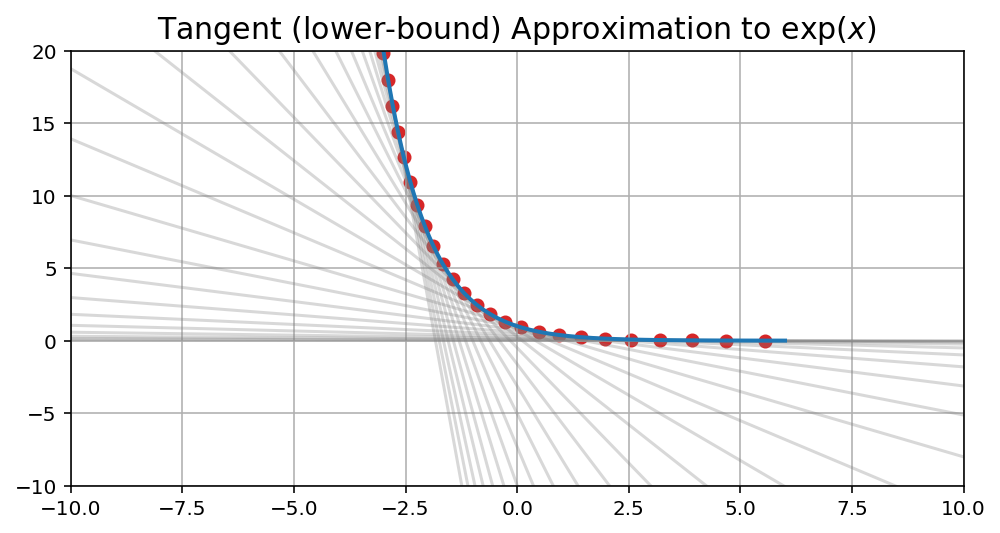

In [4]:
xlower = np.linspace(-10, 10)
etas = np.arange(-0.1, -10, -0.2)
xrange = -4 + 10 ** np.linspace(0, 1)
    
eta_init, alpha = -0.1, 1e-3
eta_collection = []
for x in xrange[::2]:
    eta_hat = gradient_descent(lambda eta: -f_linear(x, eta), eta_init, alpha=alpha)
    plt.scatter(x, f_linear(x, eta_hat), c="tab:red")
    eta_collection.append(eta_hat)
    
for eta in eta_collection:
    plt.plot(xlower, f_linear(xlower, eta), alpha=0.3, c="tab:gray")

    
plt.plot(xrange, f(xrange), linewidth=2)

plt.ylim(-10, 20)
plt.xlim(-10, 10)
plt.title("Tangent (lower-bound) Approximation to $\exp(x)$", fontsize=15)
plt.grid()

## The logistic sigmoid (Upper Bound)

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

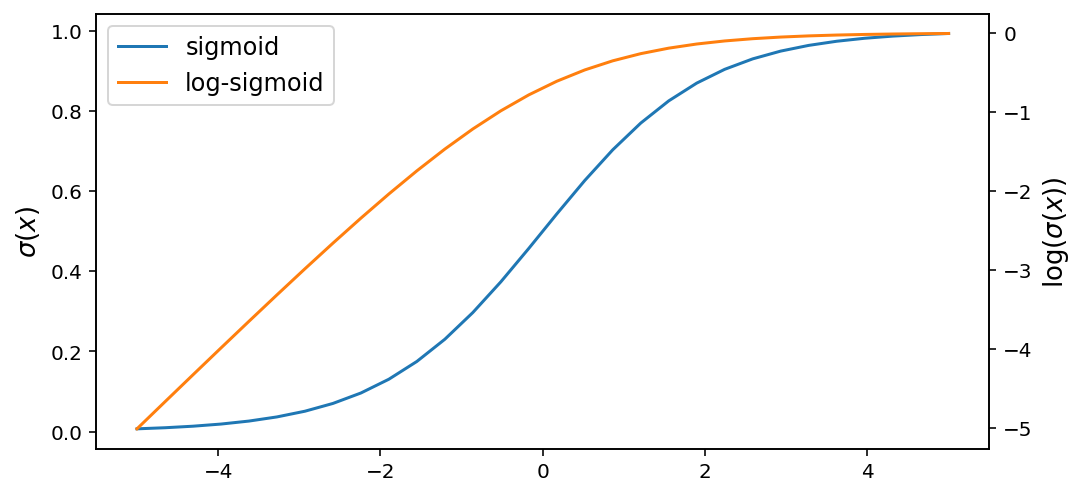

In [6]:
xrange = np.linspace(-5, 5, 30)

fig, ax = plt.subplots()
ax2 = ax.twinx()
l1 = ax.plot(xrange, sigmoid(xrange), label="sigmoid")
l2 = ax2.plot(xrange, np.log(sigmoid(xrange)), c="tab:orange", label="log-sigmoid")
lines = l1 + l2
labels = [l.get_label() for l in lines]
ax.legend(lines, labels, loc=0, fontsize=12)
ax.set_ylabel(r"$\sigma(x)$", fontsize=13)
ax2.set_ylabel(r"$\log(\sigma(x))$", fontsize=13);

### Upper bound approximation 

In [7]:
def g(η):
    return - η * np.log(η) - (1 - η) * np.log(1 - η)

In [8]:
etas = np.linspace(0.01, 0.99, 20)

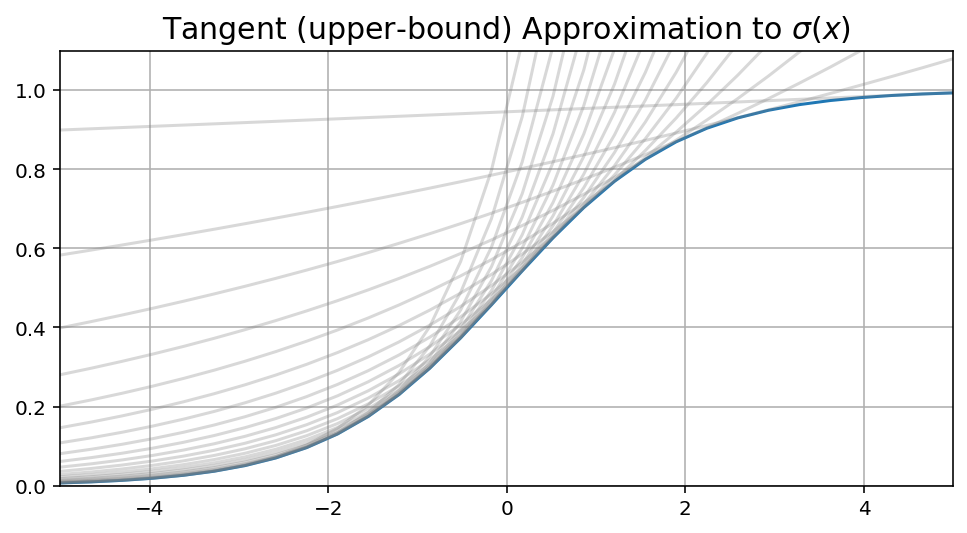

In [9]:
plt.plot(xrange, sigmoid(xrange))

for eta in etas:
    plt.plot(xrange, np.exp(eta * xrange - g(eta)), c="tab:gray", alpha=0.3)
plt.ylim(0, 1.1)
plt.xlim(-5, 5)
plt.title("Tangent (upper-bound) Approximation to $\sigma(x)$", fontsize=15)
plt.grid()

## The Logistic Sigmoid (Lower Bound)


$$
\frac{d}{dx} f(x) = \frac{d}{dx} -\log\left(e^{x/2} + e^{-x/2}\right)
$$

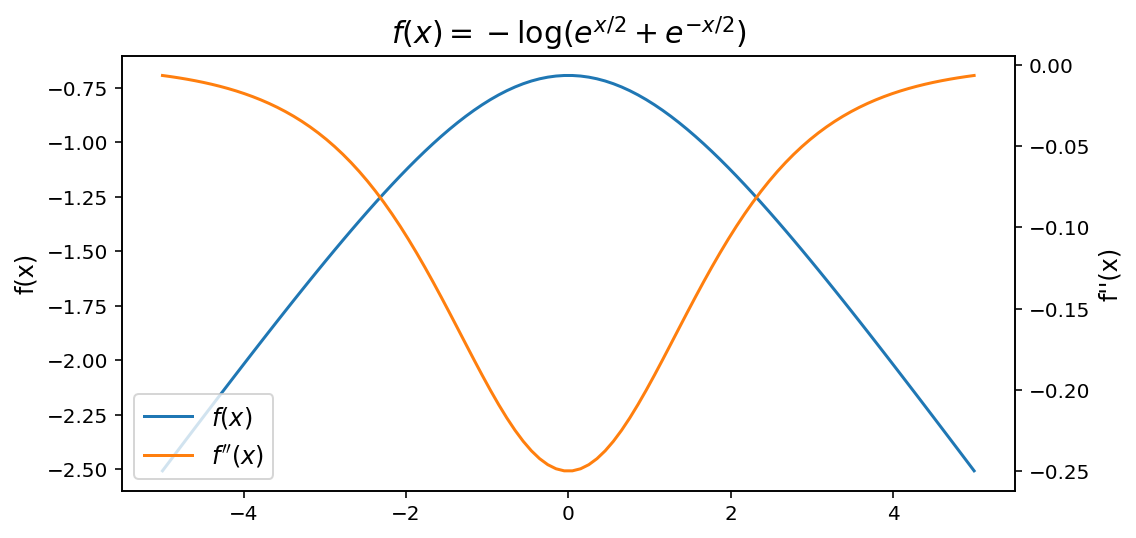

In [10]:
def f(x):
    return -np.log(np.exp(x / 2) + np.exp(-x / 2))

def f2p(x):
    return (np.tanh(x / 2) ** 2 - 1) / 4

xrange = np.linspace(-5, 5, 100)

fig, ax = plt.subplots()
ax2 = ax.twinx()
l1 = ax.plot(xrange, f(xrange), label="$f(x)$")
l2 = ax2.plot(xrange, f2p(xrange), label="$f''(x)$", c="tab:orange")
lines = l1 + l2
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, fontsize=12)
ax.set_title(r"$f(x) =-\log\left(e^{x/2} + e^{-x/2}\right)$", fontsize=15)
ax.set_ylabel("f(x)", fontsize=12)
ax2.set_ylabel("f''(x)", fontsize=12);

$$
\frac{d}{dx^2} f(x) = \frac{d}{dx^2} -\log\left(e^{x/2} + e^{-x/2}\right)
$$

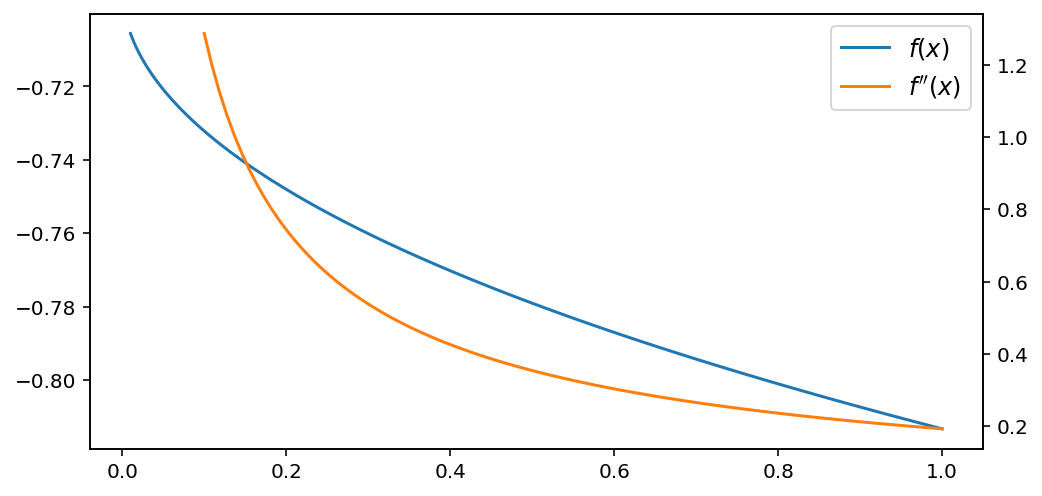

In [11]:
def f(x):
    return -np.log(np.exp(np.sqrt(x)/ 2) + np.exp(-np.sqrt(x) / 2))

def f2p(x):
    return np.power(x, -3 / 2) * np.tanh(np.sqrt(x) / 2) / 8 + (1 - np.tanh(np.sqrt(x) / 2)) / (4 * np.sqrt(x))
    
xrange = np.linspace(0.1, 1, 100)
y = xrange ** 2

fig, ax = plt.subplots()
ax2 = ax.twinx()
l1 = ax.plot(xrange ** 2, f(xrange), label="$f(x)$")
l2 = ax2.plot(xrange, f2p(xrange), label="$f''(x)$", c="tab:orange")
lines = l1 + l2
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, fontsize=12);

### Graphing the sigmoid lower bound

$$
    \sigma(\varepsilon)\exp\left((x - \varepsilon) / 2 - \lambda(\epsilon)\left[x^2 -  \varepsilon^2\right]\right) \leq \sigma(x)
$$

With
* $\lambda(x) = \frac{1}{4x}\tanh\left(\frac{x}{2}\right)$

In [17]:
def lambda_v(x):
    return np.tanh(x / 2) / (4 * x)

def sigmoid_lb(x, eps):
    return sigmoid(eps) * np.exp((x - eps) / 2 - lambda_v(eps) * (x ** 2 - eps ** 2))

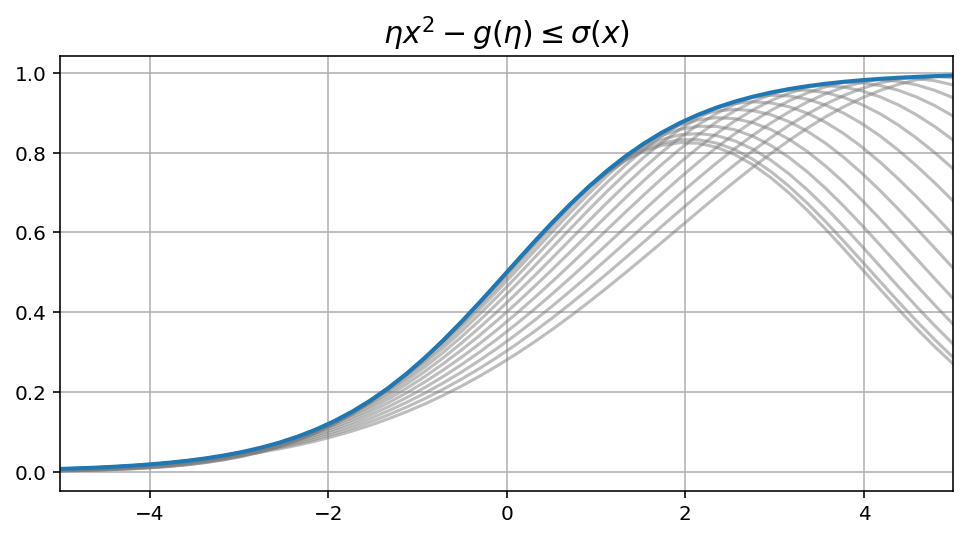

In [37]:
eps = 2.5
xrange = np.linspace(-5, 5)
epsilons = np.linspace(-5, 5, 30)
for eps in epsilons:
    plt.plot(xrange, sigmoid_lb(xrange, eps), c="tab:gray", alpha=0.3)
    
plt.plot(xrange, sigmoid(xrange), linewidth=2)
plt.grid()
plt.xlim(-5, 5)
plt.title(r"$\eta x^2 - g(\eta) \leq \sigma(x)$", fontsize=15);